# Linear Regression Project

**CaseStudy -:** You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
**Q.Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

**Q.Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
df=pd.read_csv('Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**Q.Check the head of customers, and check out its info() and describe() methods.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Q. Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

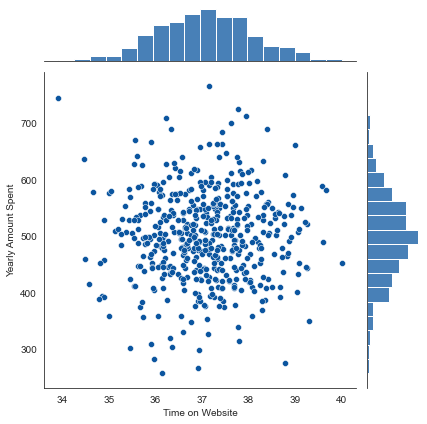

In [5]:
sns.set_palette("Blues_r")
sns.set_style('white')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

**Q.Do the same but with the Time on App column instead.**

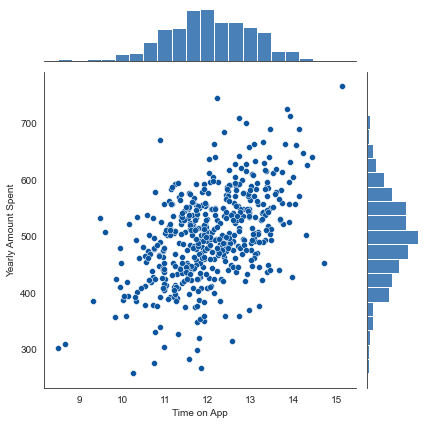

In [6]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = df)

**Q.Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

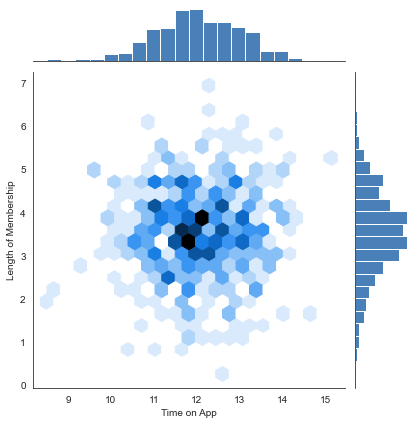

In [7]:
sns.jointplot(x = 'Time on App', y = 'Length of Membership', data = df, kind = 'hex')

**Q.Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

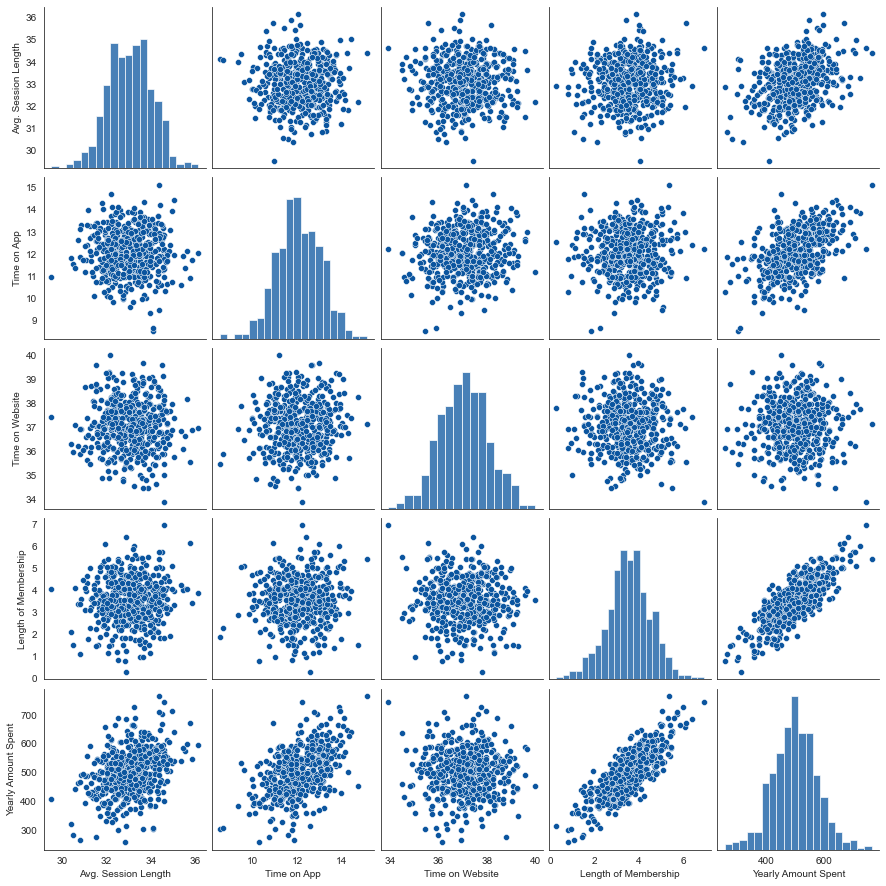

In [8]:
sns.pairplot(df)

**Q.Based ON this plot which column looks the most correlated feature with Yearly Amount Spent, write your anwser below?**

based on pairplot the length of membership column most correlated with yearly Amount spend

**Q.Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

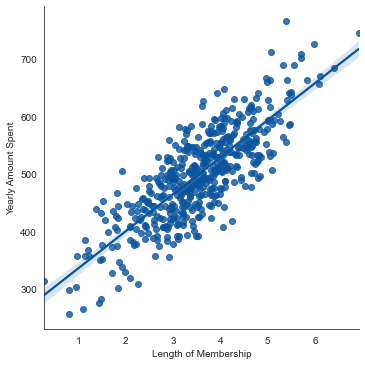

In [10]:
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data =df)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
**Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**

In [11]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [12]:
x =df.iloc[:, 3:-1].values
y =df.iloc[:, -1].values

**Q. Split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

**Step1-: import model**

In [15]:
from sklearn.linear_model import LinearRegression

**Step2-: create an object for model**

In [16]:
linreg = LinearRegression()

**Step3-: train the model**

In [17]:
linreg.fit(xtrain, ytrain)

LinearRegression()

**Q.Print out the coefficients of the model**

In [18]:
linreg.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Step 4-: predict the test set and save it in ypred and print ypred**

In [19]:
ypred = linreg.predict(xtest)
ypred

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

**Q.Create a scatterplot of the real test values versus the predicted values.**

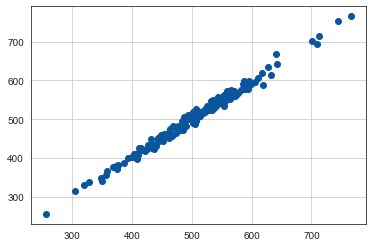

In [20]:
plt.scatter(x = ytest, y = ypred)
plt.grid(True)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Q.Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:

print(f"MAE -: {mean_absolute_error(ytest, ypred)}")
print(f"MSE -: {mean_squared_error(ytest, ypred)}")
print(f"RMSE -: {np.sqrt(mean_squared_error(ytest, ypred))}")

MAE -: 7.228148653430858
MSE -: 79.81305165097505
RMSE -: 8.933815066978667


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Q.Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

<AxesSubplot:ylabel='Density'>

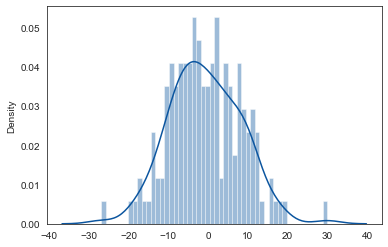

In [23]:
sns.distplot((ytest-ypred), bins = 50)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

**Q.Recreate the dataframe below.**

In [24]:
x = df.iloc[:, 3:-1] 
y = df.iloc[:, -1] 
coef_df= pd.DataFrame(linreg.coef_ ,x.columns, columns=["Coefficiet"])
coef_df

,Coefficiet
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**Q.How can you interpret these coefficients?**  write as a markdown below

- eg.seting all other x constant, if we increase **col_name** by 1 unit, the **target_col** will increase by **coefficient_value** dollars


#write your answers all columns here
- seting all other x constant,if we increase Avg. Session Length by 1 unit, the yearly amount spent will increase by 25.981550 dollars
- seting all other x constant,if we increase Time on App by 1 unit, the yearly amount spent will increase by 38.590159 dollars
- seting all other x constant,if we increase Time on Website by 1 unit, the yearly amount spent will increase by 0.190405 dollars
- seting all other x constant,if we increase Length of Membership by 1 unit, the yearly amount spent will increase by 61.279097 dollars





**Q.Do you think the company should focus more on their mobile app or on their website?**

- The Time on Website seems to have little influence on the Yearly Amount Spent, where as the Time on App show a stronger correlation
- thats why the revenue obtained through the App seems to be more important.So, the company should focus more on their mobile app .

# THE END